# Predicting Car Prices
In this project, we will use the CRISP-DM process to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. 

## Business Understanding
The CRISP-DM process starts with the understanding of the business problem. Imagine for example a used car dealer who needs estimates what the price of a used care could be. The car dealer could be interest in predicting the price of a car based on its attributes. In this project we try to answer to the following 3 business questions:
* Is the price of a car related to the horsepower?
* Is the price of a car related to the length of the car?
* Can the price of a car be predicted based on its attribute with reasonable accuracy? 


## Data Understanding 

The data is taken from the UCI machine learning repository and can be downloaded <a href = "https://archive.ics.uci.edu/ml/datasets/automobile"> here </a>. Let us read in the data and have a first look at it:

In [18]:
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv(r"C:\Repositories\Predicting-Car-Proces\data\imports-85.data")

In [8]:
data.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


We realize that the data is stored in csv-format without the column names (the first record is use as column names which is of course wrong). The name of the columns can be found using the same link as above. We store them here in a python list and load the data again:

In [9]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower',
        'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

data = pd.read_csv(r"C:\Repositories\Predicting-Car-Proces\data\imports-85.data", names=cols)

In [10]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Now we see that our data contains the correct column names. A detailed description of the dataset including a description of all the attributes can be found <a href ="https://archive.ics.uci.edu/ml/datasets/automobile"> here </a>. For example, the documentation of the dataset contains the information if an attribute is continuous. We will restrict our analysis to the continuous attributes, although it would be possible to extend the analysis to the non-continuous ones. The documentation tells us that the following attributes are continuous:

In [15]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
                          'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower',
                          'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

data = data[continuous_values_cols]
data.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


Now the data contains only the continous variables. Our aim is to predict the 'price' attribute.

## Data Preparation

If we want to use the data for machine learning, one of the first preparation steps consists of cleaning the data:

### Data Cleaning

We usually can't have any missing values in the data if we want to use them for predictive modeling. Based on the data set preview above, we can see that the normalized-losses column contains missing values represented using "?". Let's replace these values and look for the presence of missing values in other numeric columns.

In [19]:
data = data.replace('?', np.nan)
data.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


Because ? is of string type, columns containing this value were cast to the pandas object data type (instead of a numeric type like int or float). After replacing the ? values, let us cast the columns to float type and check if other mising values exists in other columns:

In [20]:
data = data.astype('float')
data.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

We see that the columns normalized-loss, bore, stroke, horsepower, peak-rpm and price contain missing values.  
Because price is the column we want to predict, let's remove any rows with missing price values:

In [21]:
data = data.dropna(subset=['price'])
data.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

We need to come up with a strategy to deal with the remaining missing values in other columns. The choice we made is replacing missing values in other columns using column means:

In [23]:
data = data.fillna(data.mean())

Let use check if there are indeed no missing values anymore:

In [24]:
data.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### Feature Scaling
As the last data preparation step, we normalize all the features in such a way that they are between 0 and 1:

In [27]:
target = data['price']
data = (data - data.min())/(data.max() - data.min())
data['price'] = target
data.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.298429,0.355598,0.494045,0.477697,0.497222,0.414145,0.564793,0.565192,0.197767,0.258864,0.394934,0.338308,0.386489,13207.129353
std,0.167520,0.176862,0.183913,0.179613,0.203985,0.200658,0.191480,0.150499,0.250310,0.174606,0.195148,0.178423,0.179346,7947.066342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000
25%,0.188482,0.230321,0.383582,0.324786,0.350000,0.264158,0.435714,0.495238,0.100000,0.102804,0.265306,0.166667,0.236842,7775.000000
50%,0.298429,0.303207,0.479104,0.444444,0.525000,0.359193,0.550000,0.580952,0.125000,0.219626,0.394934,0.305556,0.368421,10295.000000
75%,0.376963,0.460641,0.632836,0.538462,0.641667,0.557797,0.742857,0.638095,0.150000,0.317757,0.551020,0.472222,0.473684,16500.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45400.000000


## Modelling

Now that we have cleaned the data, defined the features and the target, we can start with the modelling. Since the first two business questions are dealing with how certain features are related with the price (namely the features horsepower and length of the car), we start with univariate models. We start with some univariate k-nearest neighbors models. The training will be encapsulated in a function:

In [46]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

def knn_train_test(train_col, target_col, data):
    """ Used 50% of the data to train a knn-mmodel and computes
        the r2 score based on the remaining 50% of the data
    Args:
        train_col(str): name of the column which should be used as feature
        target_col(str): name of the target column which should be predicted
        data(obj): pandas dataframe which contains the data
    Returns:
        r2(float): r2 score
    """
    
    # initialize knn regressor
    knn = KNeighborsRegressor()
    np.random.seed(41)
        
    # Permute the order in the data
    shuffled_index = np.random.permutation(data.index)
    rand_data = data.reindex(shuffled_index)

    # Define first half of the data
    last_train_row = int(len(rand_data) / 2)
    
    # Select the first half and set as training set
    # Select the second half and set as test set
    train_data = rand_data.iloc[0:last_train_row]
    test_data = rand_data.iloc[last_train_row:]
    
    # Fit a KNN model using the default k value
    knn.fit(train_data[[train_col]], train_data[target_col])
    
    # Make predictions using model
    prediction = knn.predict(test_data[[train_col]])
    
    # Calculate r2 score
    r2 = r2_score(test_data[target_col], prediction)

    return r2


Now we can use the above function to train a knn model for each feature seperate and collect the results:

In [47]:
rmse_results = dict()
train_cols = data.columns.drop('price')

# For each column (without price), train a model, return RMSE value
# and add to the dictionary rmse_results.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', data)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values(ascending=False)

horsepower           0.761284
highway-mpg          0.695403
city-mpg             0.668424
curb-weight          0.627654
width                0.542221
length               0.500840
wheel-base           0.293620
bore                 0.248743
compression-rate     0.244536
normalized-losses    0.181538
stroke               0.049243
peak-rpm             0.001608
height              -0.046938
dtype: float64

### Evaluation

At this point, we can already start to discuss the first two business question. We see that the feature horsepower explains most of the variability in the data since it has the highest r2-score. Hence, we can for sure say that horsepower is related to the price of a car. 

The length, on the other hand, does not play such a big role in explaining the price but  
it is still in the upper half of features which are orderer w.r.t. r2-score.

### Refinements

Let us analyze the model behaves w.r.t. the hyperparameter k. For that reason, we modify the above function by including a list of different k values as parameter:

In [59]:
def knn_train_test_with_k(train_col, target_col, data, lst_k_values):
    """Same as the function knn_train_test above but trains the model with 
       different k-values
       
       Args:
        train_col(str): name of the column which should be used as feature
        target_col(str): name of the target column which should be predicted
        data(obj): pandas dataframe which contains the data
        lst_k_values(obj): list of different k-values
        
    Returns:
        k_r2(obj): dictionary where the keys are the k-values and the values are the corresponding r2-score
    
    """
    
    np.random.seed(41)
        
    shuffled_index = np.random.permutation(data.index)
    rand_data = data.reindex(shuffled_index)

    last_train_row = int(len(rand_data) / 2)
    
    train_data = rand_data.iloc[0:last_train_row]
    test_data = rand_data.iloc[last_train_row:]
    
    k_r2 = {}
    
    for k in lst_k_values:
        # Fit model using k nearest neighbors
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_data[[train_col]], train_data[target_col])

        # Make predictions using model with parameter k
        predicted_labels = knn.predict(test_data[[train_col]])

        # Calculate and return r2 score
        r2 = r2_score(test_data[target_col], predicted_labels)
        
        k_r2[k] = r2
        
    return k_r2


As above, let us use this function to train a model for every single feature but now for different k-values (we choose the values k = 1,3,5,7,9,11,13,15,20):

In [64]:
k_r2_results = {}

train_cols = data.columns.drop('price')
for col in train_cols:
    r2_val = knn_train_test_with_k(col, 'price', data, lst_k_values=[1,3,5,7,9,11,13,15,20])
    k_r2_results[col] = r2_val

k_r2_results

{'bore': {1: 0.23293061869426546,
  3: 0.2918144896891518,
  5: 0.24874273417857606,
  7: 0.26516957585328882,
  9: 0.36444487352430532,
  11: 0.36670690168638365,
  13: 0.34030771479121713,
  15: 0.28865395051092879,
  20: 0.27386624540756632},
 'city-mpg': {1: 0.64508632602457205,
  3: 0.67083180919862384,
  5: 0.66842441190057289,
  7: 0.61298195745433492,
  9: 0.60191642980582616,
  11: 0.60099251058497327,
  13: 0.61098634039492361,
  15: 0.5849554577391467,
  20: 0.55544906914855929},
 'compression-rate': {1: 0.12400206165224748,
  3: 0.36354890008040386,
  5: 0.24453644015304088,
  7: 0.16878988386183369,
  9: 0.11544680405161034,
  11: 0.022813395056484609,
  13: -0.012994180381237008,
  15: 0.0026816296142917473,
  20: 0.028819341490647687},
 'curb-weight': {1: 0.43443176012616169,
  3: 0.55413649954387156,
  5: 0.6276543235169999,
  7: 0.64581190334913086,
  9: 0.63742803118721314,
  11: 0.61841123343934301,
  13: 0.61003099152111917,
  15: 0.58790796392351186,
  20: 0.580266

Let us try to visualize the above result:

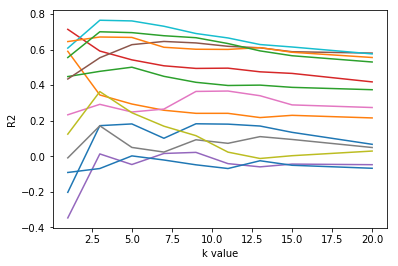

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_r2_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('R2')

Already a rough visual inspection indicates that if k is too large, the performance goes down. For most of the features which have an r2-score in the upper half, a k-value between 3-5 seems to be reasonable.

## Modelling the Price Based on Several Features
As a preparational step to use more than one feature, we compute the average r2-score across different k values for each feature.

In [68]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_r2 = {}
for k,v in k_r2_results.items():
    avg_r2 = np.mean(list(v.values()))
    feature_avg_r2[k] = avg_r2
    
series_avg_r2 = pd.Series(feature_avg_r2)
series_avg_r2.sort_values(ascending=False)

horsepower           0.671174
highway-mpg          0.624199
city-mpg             0.616847
curb-weight          0.588453
width                0.522778
length               0.427903
bore                 0.296960
wheel-base           0.292423
compression-rate     0.117516
normalized-losses    0.109345
stroke               0.072400
peak-rpm            -0.049359
height              -0.059951
dtype: float64

We define now a function which allows us to train models with several different features:

In [79]:
def knn_train_test_several_cols(train_cols, target_col, data, lst_k_values):
    """As above but allows for more than one feature.
    
       Args:
        train_cols(obj):list of names of the columns which should be used as feature
        target_col(str): name of the target column which should be predicted
        data(obj): pandas dataframe which contains the data
        lst_k_values(obj): list of different k-values
        
    Returns:
        r2(float): r2 score
        k_r2(obj): dictionary where the keys are the k-values and the values are the corresponding r2-score
    
    """
    
    np.random.seed(41)
    
    shuffled_index = np.random.permutation(data.index)
    rand_data = data.reindex(shuffled_index)

    last_train_row = int(len(rand_data) / 2)
    
    train_data = rand_data.iloc[0:last_train_row]
    test_data = rand_data.iloc[last_train_row:]
    
    k_r2 = {}
    
    for k in lst_k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_data[train_cols], train_data[target_col])

        predictions = knn.predict(test_data[train_cols])

        r2 = r2_score(test_data[target_col], predictions)       
        k_r2[k] = r2
        
    return k_r2


Now we can train models with several different features. Based on the above feature ranking w.r.t. r2-score, we will train models which include the two best features, the three best features, the four best features, the five best features and the six best features. Further, based on the analysis above, we start with a k value equals 5:

In [82]:
k_r2_results = {}

two_best_features = ['horsepower', 'highway-mpg']
r2 = knn_train_test_several_cols(two_best_features, 'price', data, lst_k_values=[5])
k_r2_results["two best features"] = r2

three_best_features = ['horsepower', 'highway-mpg', 'city-mpg']
r2 = knn_train_test_several_cols(three_best_features, 'price',data, lst_k_values=[5])
k_r2_results["three best features"] = r2

four_best_features = ['horsepower', 'highway-mpg', 'city-mpg', 'curb-weight']
r2 = knn_train_test_several_cols(four_best_features, 'price',data, lst_k_values=[5])
k_r2_results["four best features"] = r2

five_best_features = ['horsepower', 'highway-mpg', 'city-mpg', 'curb-weight', 'width']
r2 = knn_train_test_several_cols(five_best_features, 'price',data, lst_k_values=[5])
k_r2_results["five best features"] = r2

six_best_features = ['horsepower', 'highway-mpg', 'city-mpg', 'curb-weight', 'width', 'length']
r2 = knn_train_test_several_cols(six_best_features, 'price', data, lst_k_values=[5])
k_r2_results["six best features"] = r2

k_r2_results

{'five best features': {5: 0.74416494984846149},
 'four best features': {5: 0.72398360354612801},
 'six best features': {5: 0.66415602247651329},
 'three best features': {5: 0.79509012342150132},
 'two best features': {5: 0.82411134816688536}}

This analysis suggest that we should just take the two best features into account but let us also take differnt k-values into account:

In [86]:
k_r2_results = {}

two_best_features = ['horsepower', 'highway-mpg']
r2 = knn_train_test_several_cols(two_best_features, 'price', data, lst_k_values=range(1,25))
k_r2_results["two best features"] = r2

three_best_features = ['horsepower', 'highway-mpg', 'city-mpg']
r2 = knn_train_test_several_cols(three_best_features, 'price', data, lst_k_values=range(1,25))
k_r2_results["three best features"] = r2

four_best_features = ['horsepower', 'highway-mpg', 'city-mpg', 'curb-weight']
r2 = knn_train_test_several_cols(four_best_features, 'price', data, lst_k_values=range(1,25))
k_r2_results["four best features"] = r2

five_best_features = ['horsepower', 'highway-mpg', 'city-mpg', 'curb-weight', 'width']
r2 = knn_train_test_several_cols(five_best_features, 'price', data, lst_k_values=range(1,25))
k_r2_results["five best features"] = r2

six_best_features = ['horsepower', 'highway-mpg', 'city-mpg', 'curb-weight', 'width', 'length']
r2 = knn_train_test_several_cols(six_best_features, 'price', data, lst_k_values=range(1,25))
k_r2_results["six best features"] = r2

k_r2_results

{'five best features': {1: 0.72390195252686573,
  2: 0.7442943942128184,
  3: 0.78376454864323264,
  4: 0.7678678888728443,
  5: 0.74416494984846149,
  6: 0.71967656437311123,
  7: 0.70565198768994064,
  8: 0.69262772486889013,
  9: 0.68567306784292836,
  10: 0.67059102463711384,
  11: 0.66875937505601268,
  12: 0.66882355845778529,
  13: 0.66803525824612275,
  14: 0.65457694175462966,
  15: 0.64859793878909644,
  16: 0.6458688468652154,
  17: 0.64483642192522517,
  18: 0.64031221112483783,
  19: 0.63346540493571357,
  20: 0.62677046113059287,
  21: 0.62614605954553815,
  22: 0.61406073322119314,
  23: 0.60927197940090116,
  24: 0.60149878958302527},
 'four best features': {1: 0.80476032385184759,
  2: 0.82476565425885173,
  3: 0.77048752768660023,
  4: 0.7523767426289667,
  5: 0.72398360354612801,
  6: 0.70488247730666154,
  7: 0.69514529168000627,
  8: 0.69530369628177713,
  9: 0.68003754945983053,
  10: 0.68211551172942197,
  11: 0.6806665034649384,
  12: 0.66686839354545979,
  13: 

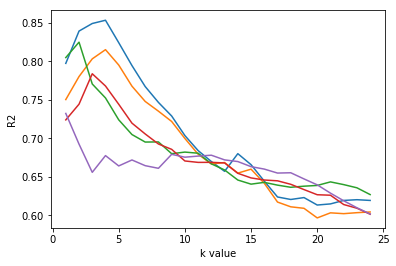

In [87]:
for k,v in k_r2_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('R2')

We conclude that the best model is the one which takes just the two best features into account and uses k=4 neighbors

## Final Conclusion

Coming back to out business questions, we have seen that the horsepower plays indeed the most important role in predicting the price of a car. The length is less important, and it has not been included in the final model for the price prediction. The best model for car price prediction which we found is a knn-model which uses just the two features horsepower and highway-mpg. With a r2-score of 85% we feel confident to give a positive answer to the last business question, i.e. we believe we ca predict the price of a care based on its features with reasonable accuracy.